<a href="https://colab.research.google.com/github/hwan95/HonegongML/blob/main/CH4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀 Logistic Regression
: 데이터가 어떤 범주에 속할 확률을 0-1 사이의 값으로 예측하고 분류해주는 지도 학습 알고리즘 

- 알고리즘은 선형회귀와 동일
- 데이터가 범주형일 때 적용

LogisticRegression 은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제하고 (L2규제) 매개 변수 C 를 사용한다( default C =1)
다만, 릿지 회귀에서의 alpha와는 다르게 C값이 작을수록 규제가 커진다.

## 데이터 준비하기

In [14]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [15]:
# species
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [16]:
# 입력 데이터 배열로 저장
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [17]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [18]:
# 타킷 데이터 배열로 저장
fish_target = fish['Species'].to_numpy()

In [19]:
# 훈련세트, 테스트 세트 분류
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state =42
)

In [20]:
# 표준화처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## K-최근접 이웃 분류기의 확률예측

-**다중 분류**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

kn= KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


### 다중 분류 multi-class classificaiton
: 타킷 데이터에 2개이상의 클래스가 포함 (알파뱃 순으로 자동정렬)


클래스확인

```
kn.classes_
```
클래스별 확률값 구하기
```
kn.predict_proba()
```

In [22]:
# 클래스  확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [23]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [24]:
# 클래스 별 확률 구하기
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
# 소수점 4번째 자리까지 반올림하여 표기
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [25]:
# 최근접 이웃 확인하기
distances, indexes = kn.kneighbors(test_scaled[3:4])

## 시그모이드 함수 sigmoid funcition
( 로지스틱 함수 logistic function)

Z값을 0~1 사이로 변환시킨다.

Z= lr.decision_function(x) : 양성 클래스에 대한 z값 

**expit(Z)** : z값에 대한 확률 출력

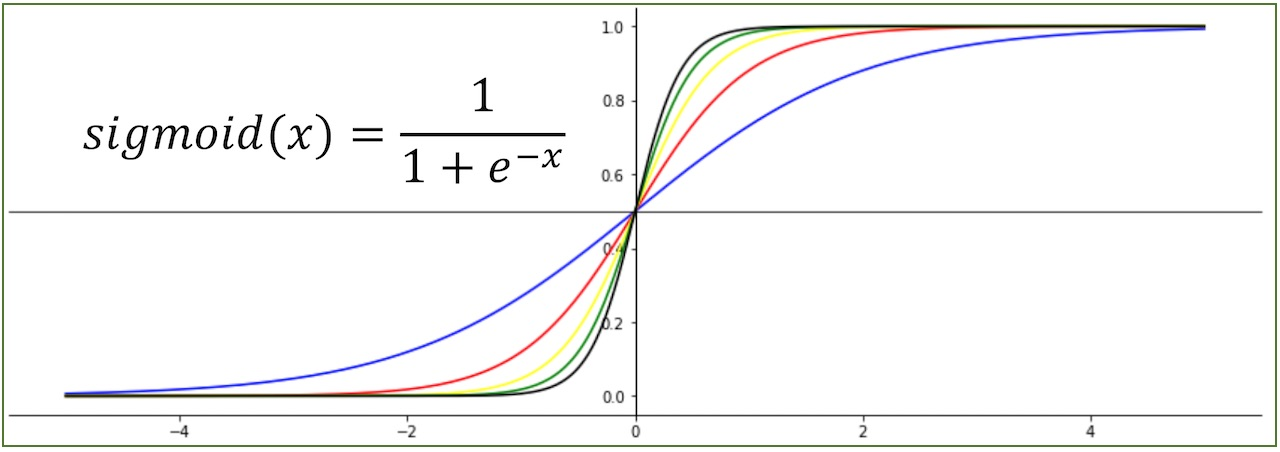

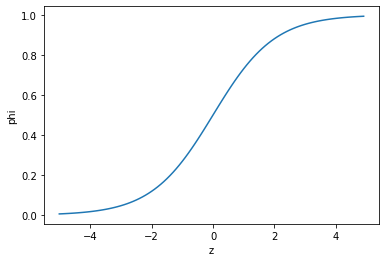

In [26]:
# 시그모이드 함수 계산

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기

** 1.불리언 인덱싱 boolean indexing**

: 넘파이 배열로 True, False 값을 전달하여 행을 선택


** 2. z값 계산 **
```
lr.decision_function()
```

In [27]:
# 불리언 인덱싱 예제
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


In [28]:
# 도미와 빙어 행을 True로 하는 불리언 인덱싱 만들기
bream_smelt_indexes = (train_target =='Bream')| (train_target =='Smelt')
# 도미와 빙어만 출력
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [29]:
# 모델 훈련하기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 훈련샘플 5개 예측
print(lr.predict(train_bream_smelt[:5]))

#예측 확률 구하기
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [30]:
# 클래스 확인
print(lr.classes_)

['Bream' 'Smelt']


In [31]:
#학습 변수 확인
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


z 값 구하기 : decision_function()

In [32]:
# 첫 5개 샘플의 z-score
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [33]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


##로지스틱 회귀로 다중분류 수행하기


: 다중 분류는 이진 분류와 달리 소프트 맥스 함수를 사용하여 z값을 확률로 변환 

가장 높은 z값의 클래스가 예측 클래스가 된다

**소프트 맥스(softmax)**
(정규화지수 함수)
```
from scipy.special import softmax
proba = softmax(Z, axis =1)
```

### 모델 

In [34]:
# 모델 생성 및 학습
lr = LogisticRegression( C =20, max_iter = 1000)
lr.fit(train_scaled, train_target)
# 훈련 점수와 테스트 점수 확인
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [35]:
# 테스트 세트의 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [36]:
#5개 샘플에 대한 예측확률
proba = lr.predict_proba(test_scaled[:5])
#소수점 3번째자리까지 반올림하여 출력
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [37]:
# 클래스 정보 확인
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [38]:
# 학습 변수 확인
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


### 소프트 맥스 

클래스의 수 가 n 개일때

각 클래스 $C_1,C_2,...,C_n$ 에 대한 z값을 $z_1,z_2,...,z_n$이라고 하자

$e_{sum}$ = $e^ {z_1} + e^{z_2} + ...+ e^{z_n}$

$s_1 = \frac{e^{z_1}}{e_{sum}, } $
$s_2 = \frac{e^{z_2}}{e_{sum}, } $
..., $s_n = \frac{e^{z_{n}}}{e_{sum}, } $

각 s 값을 모두 더하면 1이 된다


In [39]:
 # 5개 샘플에 대한 z1~z7값 구하기
 decision = lr.decision_function(test_scaled[:5])
# z-score 소수점 2 번째 자리까지 반올림하여 출력
 print(np.round(decision,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [40]:
# 소프트 맥스를 통해 확률 구하기
from scipy.special import softmax

proba = softmax(decision, axis=1)
# 확률 소수점 3번째 자리까지 출력
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [41]:
# 총합이 1인지 확인
for n in range(0,5):
  total_prob = proba[n].sum()
  print(total_prob)

1.0
1.0000000000000002
1.0000000000000002
0.9999999999999999
1.0000000000000004
